In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs

# 1. K-Means

## 1.1) Genère des données

Pour nous assurer que nos données contiennent réellement des clusters pertinents, nous les générerons nous-mêmes.

Pour ce faire, nous utiliserons [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) de `sklearn`.

Nous voulons un ensemble de données avec **500 observations**, **2 caractèristiques** et **4 clusters**.

Nous utilisons *random_state=42* pour que vous puissiez comparer les résultats.

👇 Exécutez la cellule ci-dessous pour générer vos données

In [3]:
random_state=42

# Generate data
X, y = make_blobs(n_samples=500, centers=4, random_state=random_state)

❓ Créez un nuage de points de vos deux entités l'une par rapport à l'autre
❓ Colorez les points en fonction de leur valeur correspondante dans `y`

<details span="markdown">
<summary>💡 Aide</summary>

- Rappelez-vous l'argument de couleur :
- `c` pour matplotlib
- `hue` pour seaborn

---
</details>

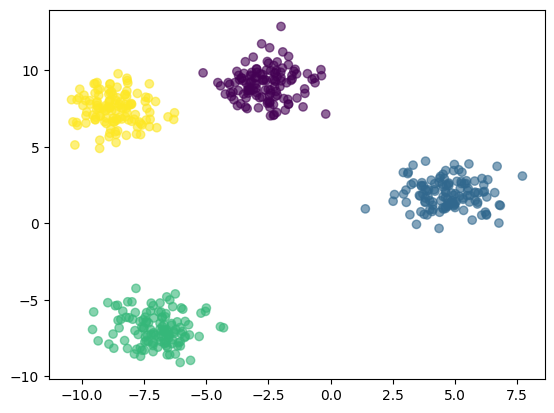

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.show()

👆 Vous devriez voir 4 groupes distincts, chacun avec une couleur différente.

Nous n'avons que 2 caractéristiques et aucune cible 😱

**Que pouvons-nous réaliser avec seulement `X` ?** 🤔

*Réponse : Identifier les "points" communs mais rien d'autres*

## 1.2) Appliquer K-Means

Votre objectif est de trouver le **nombre de clusters** qui correspond le mieux à la structure de vos données.

👉Importez `KMeans` depuis `sklearn` et lancez un modèle avec les paramètres :
- `n_clusters=2`,
- `random_state=42`

❓Ajustez le modèle sur votre `X`
❓Obtenez vos prédictions et stockez-les dans une variable `y_pred`.  

In [5]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=42).fit(X)

c:\Users\kilia\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kilia\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\kilia\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kilia\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

In [6]:
X

array([[ -7.68905443,   6.62034649],
       [ -9.57651383,  -6.93440446],
       [  6.82968177,   1.1648714 ],
       [ -2.90130578,   7.55077118],
       [ -5.67841327,  -7.28818497],
       [ -6.04929137,  -7.73619342],
       [ -6.27824322,   7.22746302],
       [ -6.60917037,  -6.9303477 ],
       [  3.57225841,   1.8307902 ],
       [ -7.50444577,  -6.85401854],
       [  3.99330595,   0.89162168],
       [ -1.35060204,   8.19360381],
       [  6.77291221,   0.02108188],
       [ -1.93830711,  10.14985177],
       [ -6.58985233,  -4.80470879],
       [  5.69830332,   0.2144302 ],
       [ -2.58120774,  10.01781903],
       [ -9.96104978,   7.70593266],
       [ -8.75604377,   8.38900329],
       [ -3.6155326 ,   7.8180795 ],
       [  3.24131126,   2.53613892],
       [ -2.30033403,   7.054616  ],
       [  5.2164358 ,   2.28441984],
       [ -7.27280373,   7.25777265],
       [ -9.28476137,   7.51761291],
       [ -6.48517505,  -7.30109407],
       [ -7.13460441,  -5.3761166 ],
 

👆 Les prédictions sont un vecteur d'attribution de cluster pour chaque observation.
Avec `n_clusters=2`, chaque observation dans `X` sera associée à l'un des deux clusters.

❓ Créez un nuage de points de vos deux caractéristiques l'une par rapport à l'autre
❓ Colorez les points en fonction du cluster prédit dans `y_pred`

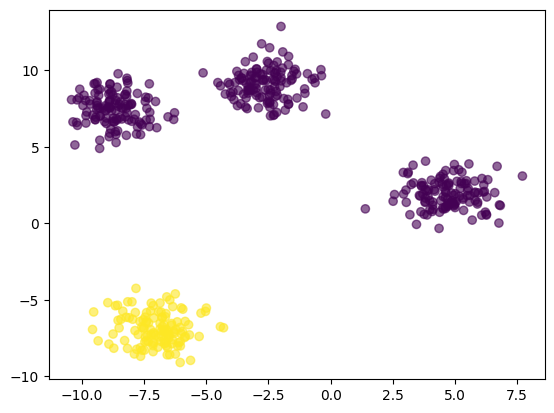

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred.labels_, alpha=0.6)
plt.show()

👆 Vous pouvez toujours voir 4 clusters distincts, mais la couleur n'en montre que 2. 😱

C'est exactement ce que nous avons demandé en donnant `n_clusters=2` à notre **Kmeans**.

Nous avons demandé à notre algorithme d'attribuer chaque observation à l'un des deux centroïdes, donc à l'un des deux clusters uniquement.

**Ce regroupement autour de 2 centres n'est clairement pas optimal, nous pouvons faire mieux** 💪

## 1.3) Trouver le nombre optimal de clusters
*La méthode du coude*

Une fois ajustée, l'instance `KMeans` obtient un attribut nommé `inertia_`.

Il représente la **somme des distances au carré des observations par rapport à leur centre de cluster associé (le plus proche)** (wcss).

Donc, plus c'est faible, mieux c'est.

In [8]:
KMeans(n_clusters=2, random_state=random_state).fit(X).inertia_

15737.083577865002

👆 Pensez à cela en comparaison avec la somme des erreurs au carré dans une régression linéaire 👇

- `SSE` d'une `régression linéaire` 👉 `Somme des distances au carré entre les observations et la ligne de régression`

- `Inertie` d'un `KMeans Clustering` 👉 `Somme des distances entre les observations et leur centroïde le plus proche`

Une façon pour nous de trouver le nombre optimal de clusters est une heuristique : la **méthode du coude** (the Elbow Method).

Nous devons essayer plusieurs nombres de clusters et regarder l'inertie obtenue pour chacun d'eux.

Faisons-le pour avoir l'intuition ! ⚙️🧠

❓ Ajustez un `KMeans` pour chaque nombre de clusters compris entre 1 et 10, pour chacun, enregistrez l'inertie dans une liste `wcss`

In [9]:
# Apply the elbow method to find the optimal number of clusters.
wcss = []
clusters = list(range(1, 11))

❓ Tracez les inerties dans « wcss » par rapport à leur nombre

de clusters correspondant ❓

In [10]:
for numbers_clusters in clusters:
    mod = KMeans(n_clusters=numbers_clusters, random_state=random_state)
    mod.fit(X)
    wcss.append(mod.inertia_)


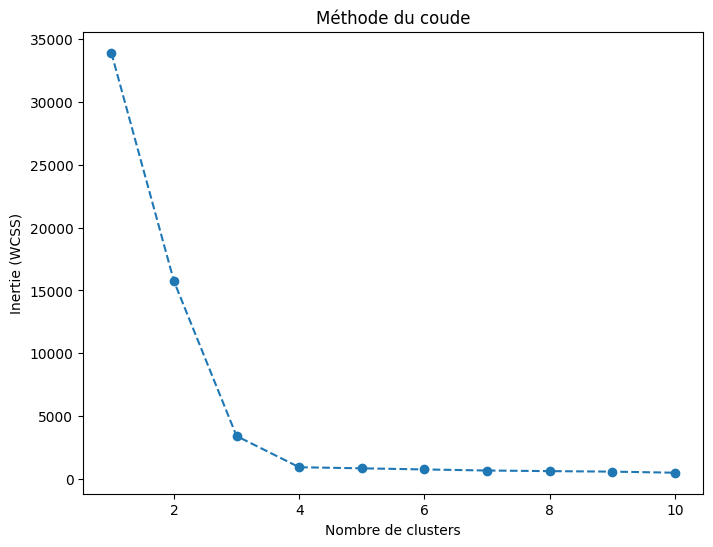

In [11]:
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--')

plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (WCSS)')

plt.show()

Le plus optimale est 9 clusters d'après les résultats

## 3) K-Means avec les clusters optimals

Une fois le nombre optimal de clusters connu, il est temps d'ajuster un dernier `KMeans`.

❓ Ajustez un `KMeans` avec `n_clusters=4` sur votre `X`, stockez les prédictions dans `y_pred`

❓ Faites un nuage de points de vos deux caractéristiques l'une par rapport à l'autre et coloriez les points en fonction du cluster prédit dans `y_pred`

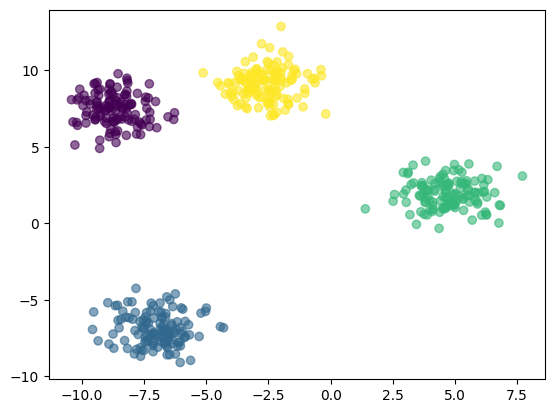

In [12]:
y_pred = KMeans(n_clusters=4).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.labels_, alpha=0.6)
plt.show()

Nous avons réussi à identifier **4 clusters** parmi nos observations.

# 2. Compression d'image

Dans ce défi, nous utiliserons des **images** 🖼️ comme données.

Vous utiliserez **K-means** pour la compression d'image, en réduisant les couleurs d'une image aux seules couleurs les plus fréquentes.

## 2.1) Images avec Python

Cette section devrait vous donner une idée de la manière dont nous traitons les images en Python.

Aucun codage n'est requis pour la section 1), lisez attentivement et exécutez les exemples fournis.

### 2.1.1) Black & white images

Une image peut être décrite comme une matrice où chaque élément est un pixel.

L'échelle des couleurs est comprise entre 0 (noir) et 255 (blanc).

Ainsi, chaque élément de la matrice aura une valeur comprise entre 0 et 255.

<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">

Nous avons dit « matrice », vous avez pensé « numpy », c'est exact 🙂

👇 Exécutez la cellule ci-dessous pour voir une image en noir et blanc créée uniquement avec « numpy ».

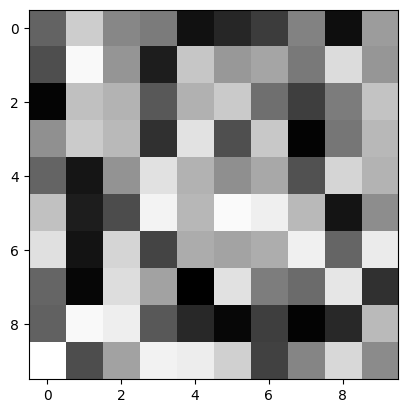

In [13]:
# Let's create  a vector of 100 elements with a value between 0 and 255
image_bw = np.random.uniform(low=0, high=255, size=100)

# Reshape it into a squared matrix, we have an image of 10x10 pixels
image_bw = image_bw.reshape((10, 10))

# Finally display the generated image
plt.imshow(image_bw, cmap='gray')
plt.show()

### 2.1.2) Images couleur :

Chaque couleur est une combinaison linéaire de couleurs primaires : Rouge, Vert, Bleu

Une image colorée n'est que la superposition de trois calques, un pour chaque couleur primaire.

Ainsi, pour chaque pixel, nous avons trois valeurs (Rouge, Vert, Bleu).

<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

👇 Encore une fois, exécutez les cellules ci-dessous pour voir une image colorée créée uniquement avec `numpy`.

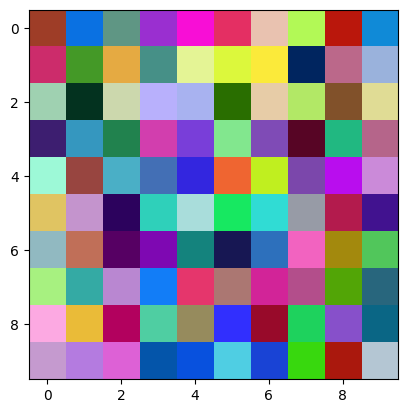

In [14]:
# Let's create vector of 100*3 elements with a value between 0 and 1
image_c = np.random.uniform(low=0., high=1., size=100*3)

# Reshape it into a squared image of 10x10 pixels with 3 colors
image_c = image_c.reshape((10, 10, 3))

# Finally display the generated image
plt.imshow(image_c)
plt.show()

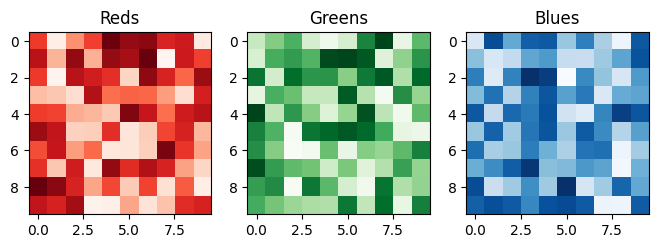

In [15]:
# To get some intuition, let's plot each color layer
fig, axs = plt.subplots(1, 3, figsize=(8, 6))
colors = {0:'Reds', 1:'Greens', 2:'Blues'}

for i in colors:
    axs[i].imshow(image_c[:, :, i], cmap=colors[i])
    axs[i].set_title(colors[i])

## 2.2) Images pour ML

### 2.2.1) Setup

Installez la bibliothèque `skimage`, elle nous donnera accès aux images classiques

In [16]:
from skimage import data
img = data.astronaut()
plt.imshow(img)
plt.show()


ModuleNotFoundError: No module named 'skimage'

❓ Quelle est la forme de cette image ?
Affectez-la à `img_shape`

In [ ]:
img_shape = img.shape
print(img_shape)

(512, 512, 3)


### 2.2.2) Nombre de couleurs

Pour préparer notre image à la compression, ou au ML en général, nous devons la représenter sous forme d'**observations** et de **caractéristiques**.

Chaque **pixel** est une **observation**
Chaque **valeur de couleur (rouge, vert, bleu)** est une **caractéristique**

Dans notre image, nous avons **262 144 observations** (512 * 512 pixels) et **3 caractéristiques** (RVB)

❓ Remodeler l'image :
- À partir de sa taille actuelle de « largeur * hauteur * 3 »
- Vers une matrice de taille « N * 3 » où « N = largeur * hauteur »

Affecter l'image remodelée à « X ».

In [ ]:
# Reshape
X = img.reshape(img_shape[0] * img_shape[1], img_shape[2])

Une image colorée peut contenir jusqu'à 16 millions de couleurs potentielles.

En effet, pour chaque pixel nous avons **3** canaux, et pour chaque canal nous avons **256** valeurs possibles (de 0 à 255)
D'où un maximum potentiel de **16 777 216** *($256^3$)* couleurs dans une image colorée

Comme notre image ne fait que 262 144 pixels (512 * 512), elle utilise au maximum 262 144 couleurs, car chaque pixel contient une seule couleur définie par les valeurs des trois canaux

Comptons ! 🕵️

❓ Stockez le nombre de couleurs uniques dans cette image dans `color_count`

In [ ]:
color_count = len(np.unique(X.reshape(-1, 3), axis = 0))
color_count

113382

Décomposons ce que nous avons :
- 262 144 observations, chaque observation étant un pixel
- 3 caractéristiques (valeurs rouge, verte et bleue) pour chaque observation
- Un nombre inconnu de clusters 😱

**Voyons ce que nous pouvons faire pour réduire le nombre de couleurs** 🎨

## 2.3) Compression avec K-means

Nous voulons réduire les **113 382** couleurs à **K** couleurs.

En utilisant un algorithme `KMeans` sur les pixels, nous pouvons attribuer chaque pixel à l'un des **K** clusters !

Le centre de chaque cluster sera la couleur moyenne des pixels qui lui appartiennent.

Nous pouvons ensuite utiliser cette « couleur moyenne du cluster » comme valeurs RVB pour chaque pixel du cluster.

💪🧠 Allons-y, notre objectif est d'utiliser seulement **32** couleurs !*

*❓* Ajustez un K-means avec `n_clusters=32` sur votre image ML-ready `X` et attribuez-le à `kmeans`

In [ ]:
pred_y = KMeans(n_clusters=32, random_state=42).fit(X)

👉 Vérifiez les `labels_` de vos `kmeans`, puis vérifiez leur `forme` et leur `nombre de valeurs uniques`

In [ ]:
print(pred_y.labels_)

[ 8 15 20 ...  4  4  4]


☝️ Décomposons tout cela :

- Chaque étiquette est un cluster
- Une étiquette est attribuée à chaque observation
- Il y a au total 32 étiquettes différentes, une pour chaque cluster

❓ Vérifiez les `cluster_centers_` de vos `KMeans`, la forme et le premier élément

In [ ]:
print(pred_y.cluster_centers_)


[[236.53936348 230.98555276 234.33752094]
 [ 63.7896531   32.03027872   7.02947664]
 [211.13083966  91.29704985  55.5548165 ]
 [181.96688698 173.23512859 169.08422224]
 [  1.76650729   0.8917249    0.89878632]
 [106.02872063  97.21470175  96.06406909]
 [167.17078289  51.27909605  12.52784504]
 [104.5193432   11.28212464  23.86030601]
 [151.23777276 141.39909707 140.88924003]
 [223.9464617  109.33858998  73.41081368]
 [214.21137072 204.70389408 202.37383178]
 [ 52.17360338  44.70709993  39.46984198]
 [170.03676875 159.48954704 156.25628095]
 [ 95.16804636  69.49806843  21.06953642]
 [ 95.62109552  54.75735627 138.88999547]
 [130.07615521 120.91080341 119.86185799]
 [ 25.59477756  10.5860735   53.46292714]
 [203.35364404 194.15301845 191.2010635 ]
 [192.47509147  74.89966226  34.57402195]
 [206.38083462 167.1755796  142.39814529]
 [ 50.27150538  35.35035842  91.22535842]
 [ 29.49464044  14.00811739   8.08658549]
 [225.82929857 193.53910615 170.71756673]
 [132.53989273  21.98876969  18.53

In [ ]:
print(type(pred_y.cluster_centers_))

<class 'numpy.ndarray'>


☝️Chaque cluster_center est un vecteur de valeurs RVB, il représente la couleur moyenne du cluster

❓ Créez un tableau `X_compressed`, qui stocke pour chaque pixel de l'image la couleur moyenne de son cluster correspondant.

<details span="markdown">
<summary>💡 Aide</summary>

Vous pouvez y parvenir en utilisant uniquement `kmeans.cluster_centers_` et `kmeans.labels_`

---

</details>

In [ ]:
X_compressed = pred_y.cluster_centers_

Les valeurs RVB doivent être des entiers.

Nos couleurs dans `X_compressed` sont en `float64`.

❓ Convertissez `X_compressed` en `uint8`, le type entier non signé de 8 bits qui se situe entre 0 et 255.

In [ ]:
X_compressed = X_compressed.astype(np.uint8)

❓ Vérifiez que le nombre de couleurs uniques utilisées est bien de 32.

In [ ]:
print(X_compressed.shape)

(32, 3)


## 2.4) Tracer une image compressée

Notre `X_compressed` a la forme (262144, 3), nous ne pouvons pas l'afficher comme une image.

❓ Remodelez votre image compressée et tracez-la côte à côte avec votre image d'origine.

<details>
<summary>💡 Astuce</summary>

Vous devez remodeler votre `X_compressed` aplati dans les bonnes dimensions pour une image
Votre image d'origine a de telles dimensions.

---

</details>

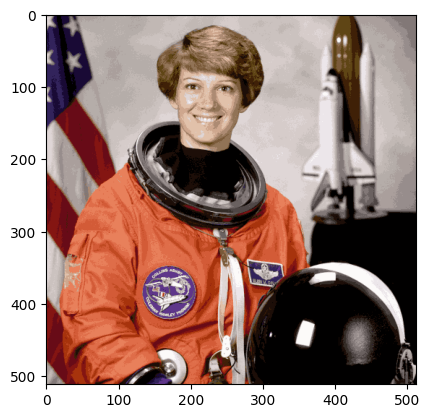

In [ ]:
# Reform the compressed image based on the labels from KMeans
X_compressed = pred_y.cluster_centers_[pred_y.labels_]
X_compressed = X_compressed.astype(np.uint8)
X_compressed = X_compressed.reshape(img_shape)

plt.imshow(X_compressed)
plt.show()


Bravo ! 💪

Certaines couleurs sont perdues, mais vous pouvez facilement reconnaître l'image originale.

## 2.5 - Utiliser la méthode du coude

Vous pouvez essayer d'utiliser la méthode du coude pour trouver la compression optimale qui perd le moins d'informations de couleur.

Essayez de tracer l'inertie pour `n_clusters` dans la liste [5, 10, 20, 30, 50, 70, 100] par exemple

⚠️ Entraînement long, vous pourriez attendre plusieurs minutes

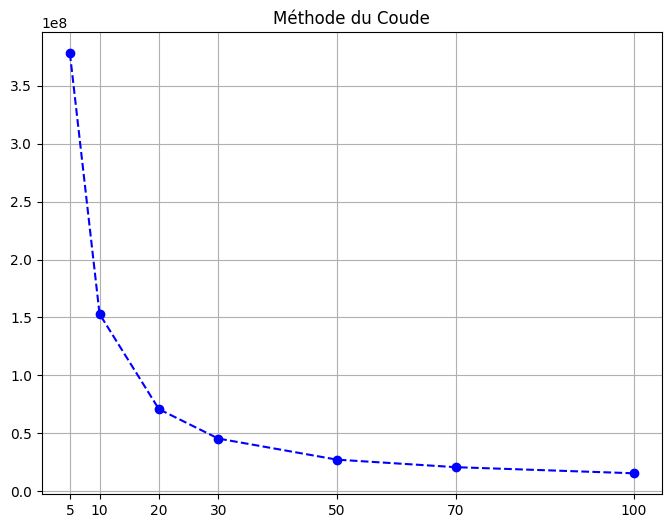

In [ ]:
# YOUR CODE HERE
n_clusters_list = [5, 10, 20, 30, 50, 70, 100]

inertias = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X) 
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(n_clusters_list, inertias, marker='o', linestyle='--', color='b')
plt.title('Méthode du Coude')

plt.xticks(n_clusters_list)
plt.grid(True)
plt.show()

❓ Exécutez la cellule ci-dessous pour visualiser votre image compressée en utilisant un nombre différent de clusters
⚠️ C'est un long entraînement, vous attendrez quelques minutes

working with 1 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 1 clusters...
The Kmeans inertia is equal to 4891993276.00374


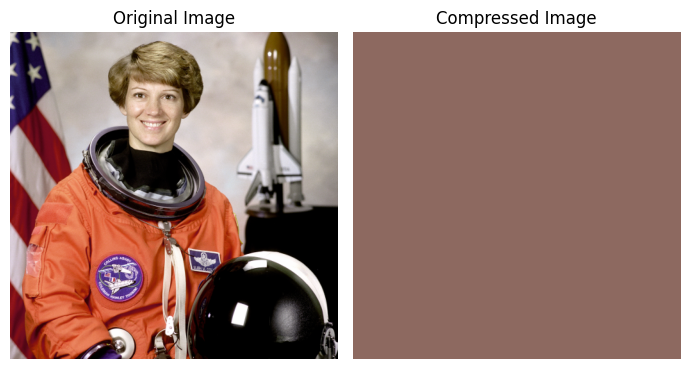

working with 2 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 2 clusters...
The Kmeans inertia is equal to 1509787431.1522121


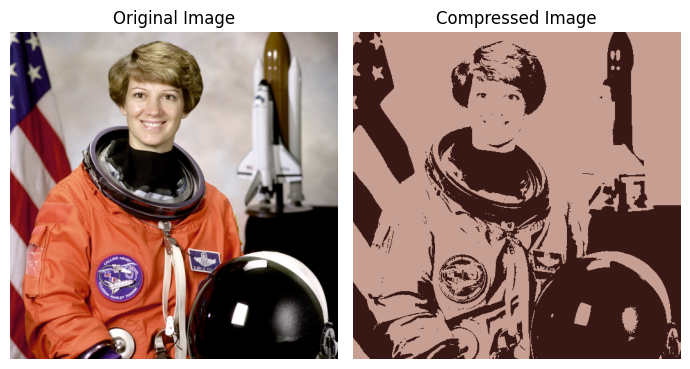

working with 5 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 5 clusters...
The Kmeans inertia is equal to 379592313.6505418


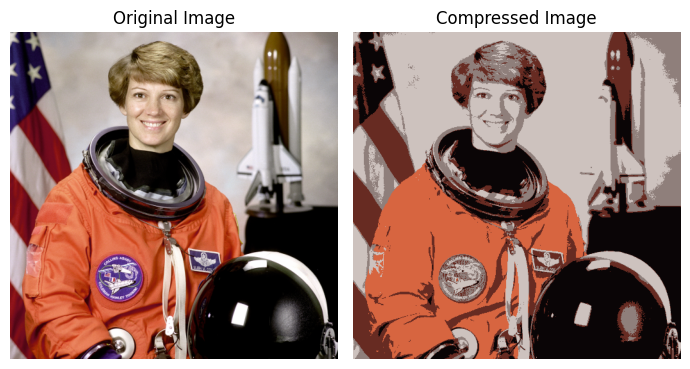

working with 10 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 10 clusters...
The Kmeans inertia is equal to 153219450.1595148


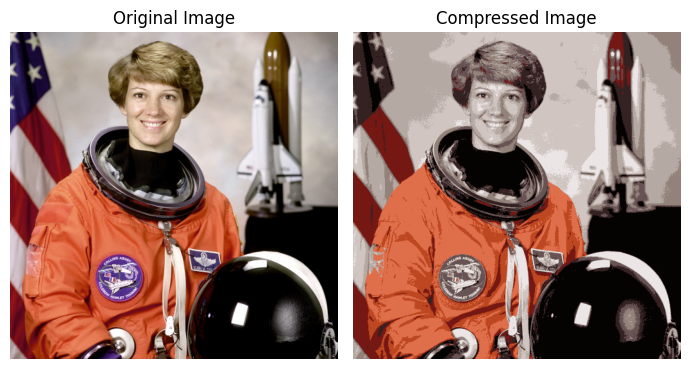

working with 20 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 20 clusters...
The Kmeans inertia is equal to 73368334.43232834


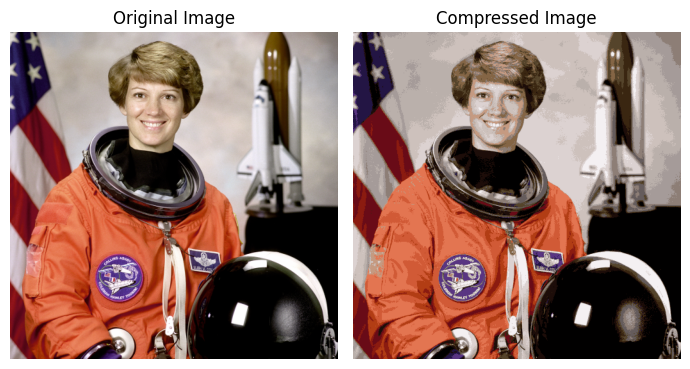

working with 30 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 30 clusters...
The Kmeans inertia is equal to 45810378.14480692


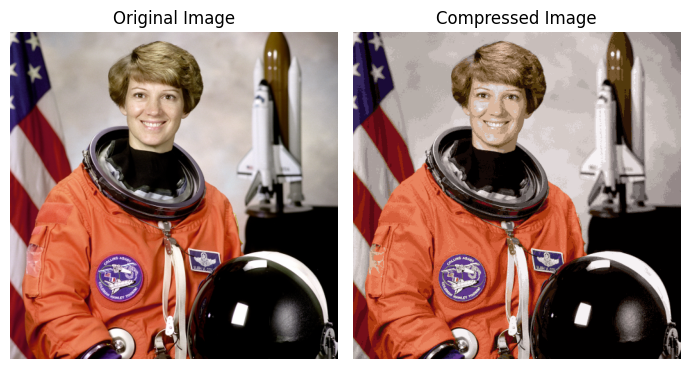

working with 50 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 50 clusters...
The Kmeans inertia is equal to 27716133.982721344


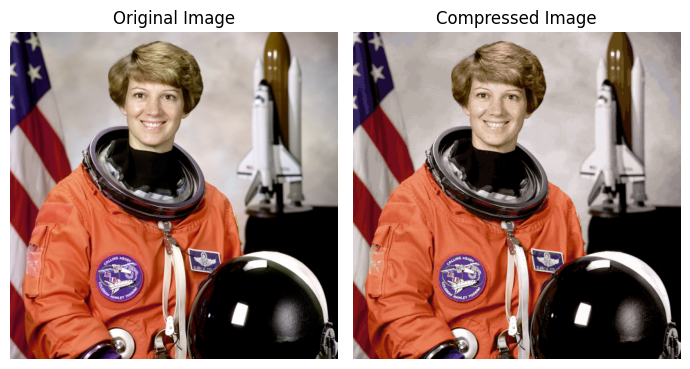

working with 70 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 70 clusters...
The Kmeans inertia is equal to 20888304.605078477


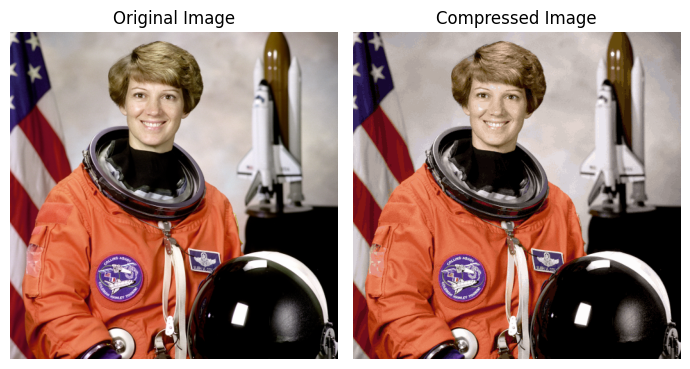

working with 100 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 100 clusters...
The Kmeans inertia is equal to 15424296.927447008


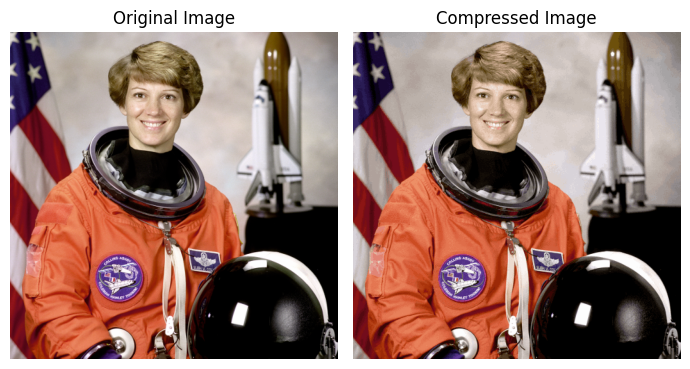

In [ ]:
wcss = []
compressed_astronaut = []
for i in [1, 2, 5, 10, 20, 30, 50, 70, 100]:
    print('working with ' + str(i) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = i, max_iter=10)
    kmeans.fit(X)
    # compute inertia
    wcss.append(kmeans.inertia_)
    # compute compressed astronaut
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    X_compressed = centers[labels]
    X_compressed = X_compressed.astype('uint8')
    img_compressed = X_compressed.reshape(img_shape[0], img_shape[1], img_shape[2])
    compressed_astronaut.append(img_compressed)
    # printing
    print("-"*120)
    print(f"If we compress our 113382 unique colors into {i} clusters...")
    print(f"The Kmeans inertia is equal to {kmeans.inertia_}")
    fig, ax = plt.subplots(1, 2, figsize = (7, 7))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[1].imshow(img_compressed)
    ax[1].set_title('Compressed Image')
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()